<h1>Deeplearning: Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Data---MNIST-Digit-Recognition---10-classes" data-toc-modified-id="Data---MNIST-Digit-Recognition---10-classes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data - MNIST Digit Recognition - 10 classes</a></span><ul class="toc-item"><li><span><a href="#Examples-of-Digits" data-toc-modified-id="Examples-of-Digits-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Examples of Digits</a></span></li></ul></li><li><span><a href="#Convolutional-Neural-Network-(CNN)" data-toc-modified-id="Convolutional-Neural-Network-(CNN)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Convolutional Neural Network (CNN)</a></span><ul class="toc-item"><li><span><a href="#Training,-only-2-epochs" data-toc-modified-id="Training,-only-2-epochs-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Training, only 2 epochs</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Prediction</a></span></li><li><span><a href="#Accuracy" data-toc-modified-id="Accuracy-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Accuracy</a></span></li></ul></li></ul></div>

# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
import keras
from keras import layers

# Data - MNIST Digit Recognition - 10 classes

It already comes as trainging and testing set, so you don't need to split it yourself

In [5]:
(Xt, yt), (Xs, ys) = keras.datasets.mnist.load_data()

In [6]:
Xt.shape, Xs.shape, yt.shape, ys.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

## Examples of Digits

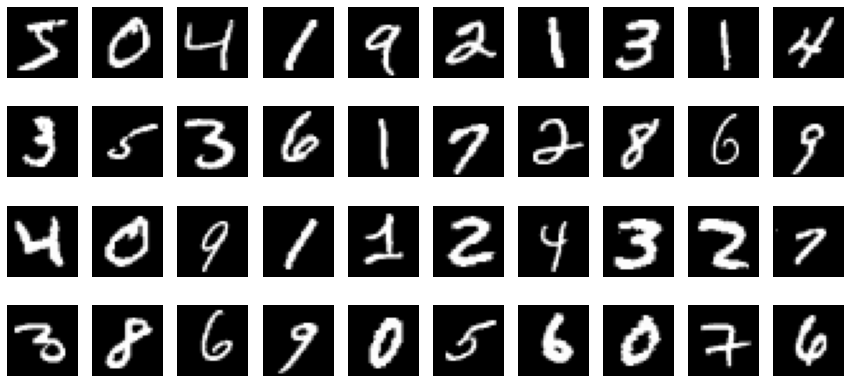

In [14]:
plt.figure(figsize=(15,7))
for k in range(40):
    plt.subplot(4,10,k+1)
    plt.imshow(Xt[k],cmap='gray')
    plt.axis('off')
plt.show()

# Convolutional Neural Network (CNN)

In [24]:
def modelCNN(input_shape=(28,28,1),output=10):
    Input = keras.Input(shape=input_shape)
    x = layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(Input)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(output, activation="softmax")(x)
    
    model = keras.models.Model(Input, output)
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [48]:
model = modelCNN()
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1600)              0   

In [35]:
Xt = Xt[:,:,:,None]
Xs = Xs[:,:,:,None]
Xt.shape, Xs.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

## Training, only 2 epochs

In [33]:
history = model.fit(Xt, yt, batch_size=128, epochs=2, verbose=1,validation_data=(Xs, ys),)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 27s 453us/step - loss: 0.1420 - accuracy: 0.9574 - val_loss: 0.0641 - val_accuracy: 0.9807
Epoch 2/2
60000/60000 [==============================] - 27s 451us/step - loss: 0.1148 - accuracy: 0.9644 - val_loss: 0.0597 - val_accuracy: 0.9817


## Prediction

**Keras model gives you probability scores**

In [36]:
ytp = model.predict(Xt)
ysp = model.predict(Xs)

**Converting probabilities to class number by computing the maximum probabilty**

In [41]:
ytpI = np.argmax(ytp,1)
yspI = np.argmax(ysp,1)

**Predicted classes for first 10 training examples**

In [43]:
ytpI[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int64)

**Actual classes of first 10 training examples**

In [49]:
yt[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Accuracy

In [50]:
print('Training Accuracy : ',np.mean(ytpI==yt))
print('Testing  Accuracy : ',np.mean(yspI==ys))

Training Accuracy :  0.9851333333333333
Testing  Accuracy :  0.9817
